**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
movie_data=pd.read_csv('/content/drive/MyDrive/IMDb Movies India.csv', encoding='latin-1')

In [ ]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
print(movie_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [ ]:
print(movie_data.describe())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [ ]:
movie_data.shape

(15509, 10)

**Data Cleaning**

In [ ]:
movie_data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
movie_data.duplicated().sum()

np.int64(6)

In [ ]:
movie_data.dropna(inplace=True)

In [ ]:
movie_data.shape

(5659, 10)

In [ ]:
movie_data.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
movie_data.drop_duplicates(inplace=True)

In [ ]:
movie_data.shape

(5659, 10)

**PreProcessing**

In [ ]:
movie_data['Year']=movie_data['Year'].str.extract(r'(\d+)').astype(float).astype('Int64')

In [ ]:
movie_data['Duration']=pd.to_numeric(movie_data['Duration'].str.replace('min', ''))

In [ ]:
movie_data['Votes']=pd.to_numeric(movie_data['Votes'].str.replace(',', '', regex=True))

In [ ]:
movie_data['Genre']=movie_data['Genre'].str.split(",")
movie_data=movie_data.explode('Genre')
movie_data['Genre']=movie_data['Genre'].fillna(movie_data['Genre'].mode()[0])

In [ ]:
top_directors=movie_data['Director'].value_counts().nlargest(10).index
movie_data['Director']=movie_data['Director'].where(movie_data['Director'].isin(top_directors), 'Other')
movie_data=pd.get_dummies(movie_data, columns=['Director'], drop_first=True)


In [ ]:
x=movie_data.drop(columns=['Rating', 'Name'])
y=movie_data['Rating']

**Model Training**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
x_train=pd.get_dummies(x_train, drop_first=True)
x_test=pd.get_dummies(x_test, drop_first=True)

In [ ]:
x_train, x_test=x_train.align(x_test, join='left', axis=1, fill_value=0)

In [ ]:
model=RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
print("Model training successfull")

Model training successfull


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
print("\n Model Performance")
print(f"mean absolute error:{mae}")
print(f"mean squared error:{mse}")
print(f"r2 score :{r2:.3f}")


 Model Performance
mean absolute error:0.42333597662771283
mean squared error:0.43418236352253764
r2 score :0.771


In [ ]:
new_movie=pd.DataFrame({
    'Year':[2023],
    'Duration':[120],
    'votes':[100000],
    'Gener':['Action'],
    'Director':['Other'].append(top_directors)

})

In [ ]:
new_movie=pd.get_dummies(new_movie,columns=['Gener','Director'],drop_first=True)

In [ ]:
new_movie=new_movie.reindex(columns=x_train.columns,fill_value=0)

In [ ]:
predicted_rating=model.predict(new_movie)
print(f"predicted IMDB RATING FOR NEW MOVIE:{predicted_rating[0]}")

predicted IMDB RATING FOR NEW MOVIE:6.882000000000001


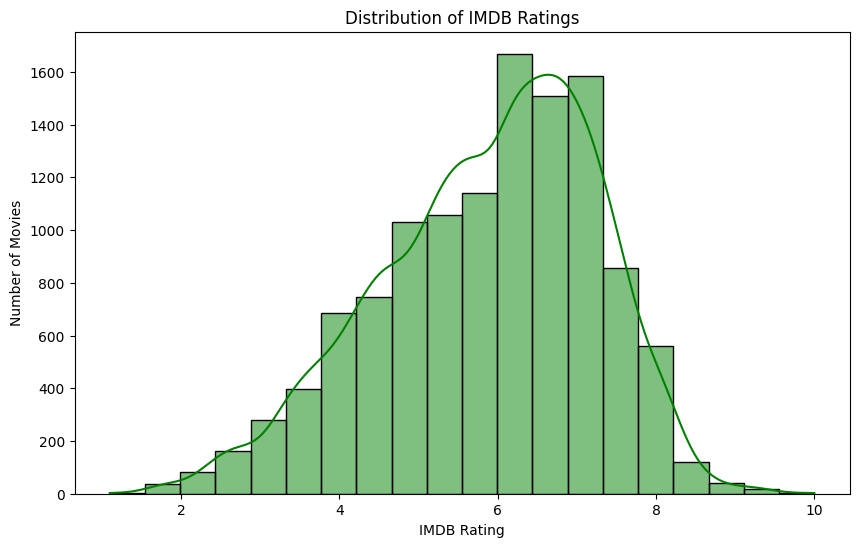

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(movie_data['Rating'],bins=20,kde=True,color='green')
plt.xlabel('IMDB Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of IMDB Ratings')
plt.show()

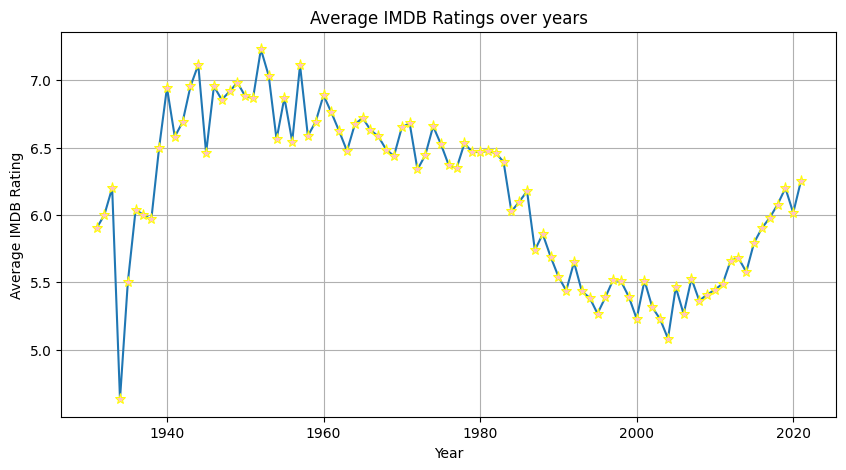

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=movie_data.groupby('Year')['Rating'].mean(),marker='*',markerfacecolor='pink',markeredgecolor='yellow',ms=8)
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.title('Average IMDB Ratings over years')
plt.grid(True)
plt.show()

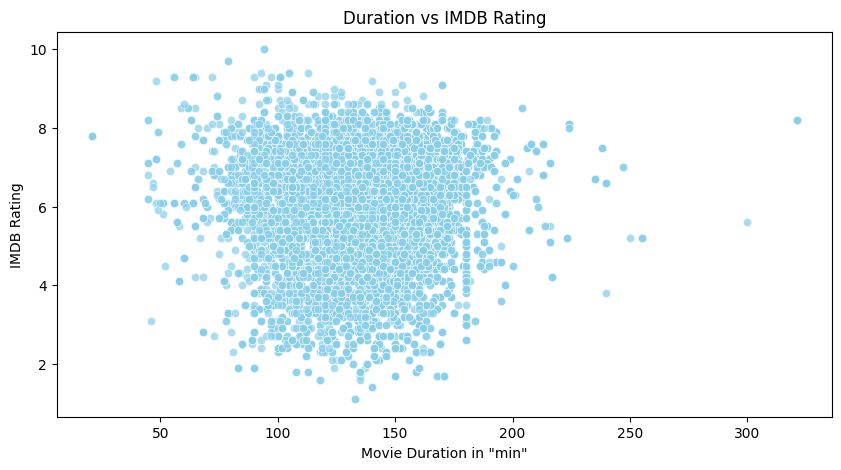

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Duration',y="Rating",alpha=0.7,data=movie_data,color='skyblue')
plt.xlabel('Movie Duration in "min"')
plt.ylabel('IMDB Rating')
plt.title('Duration vs IMDB Rating')
plt.show()


<ipython-input-133-9409c1666918>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gener_avg_rating.index,y=gener_avg_rating.values,palette='coolwarm')


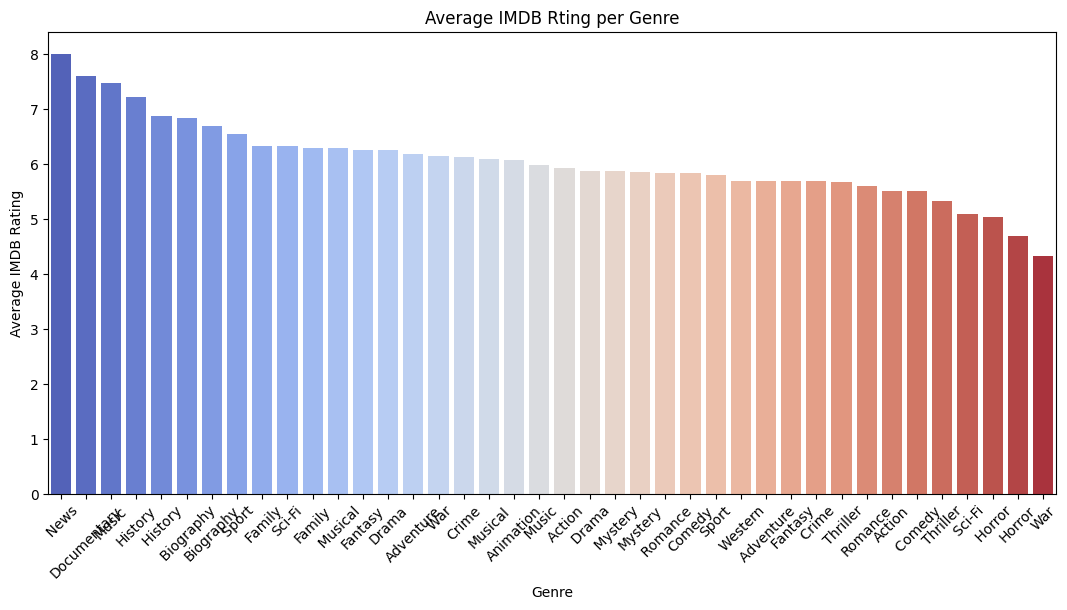

In [ ]:
plt.figure(figsize=(13,6))
gener_avg_rating=movie_data.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=gener_avg_rating.index,y=gener_avg_rating.values,palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average IMDB Rating')
plt.title('Average IMDB Rting per Genre')
plt.show()

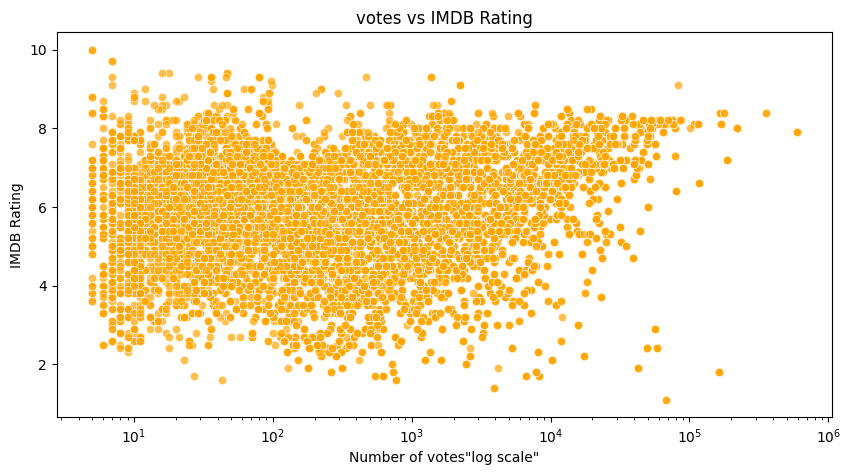

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=movie_data['Votes'],y=movie_data['Rating'],alpha=0.7,color='orange')
plt.xscale('log')
plt.xlabel('Number of votes"log scale"')
plt.ylabel('IMDB Rating')
plt.title('votes vs IMDB Rating')
plt.show()